In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import cv2 as cv

import os

import glob

from openpyxl import load_workbook

from datetime import datetime

import seaborn as sns

In [2]:
df=pd.read_csv("c:/data/dacon/total_merge.csv")

In [3]:
df.head(10)

,시간,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,레드 LED동작강도,...,냉방부하,난방온도,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,case,이미지면적,무게
0,2021-05-28 02:46,22.600000,21.299999,78.199997,54.0,597.0,0.0,126.0,0.0,0.0,...,8.000002,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
1,2021-05-28 02:47,22.600000,21.400000,79.099998,54.0,598.0,0.0,126.0,0.0,0.0,...,8.000002,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
2,2021-05-28 02:48,22.700001,21.400000,79.599998,54.0,607.0,0.0,126.0,0.0,0.0,...,8.500004,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
3,2021-05-28 02:49,22.700001,21.299999,79.900002,54.0,608.0,0.0,126.0,0.0,0.0,...,8.500004,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
4,2021-05-28 02:50,22.700001,21.400000,80.300003,54.0,610.0,0.0,126.0,0.0,0.0,...,8.500004,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
5,2021-05-28 02:51,22.700001,21.299999,80.599998,54.0,609.0,0.0,126.0,0.0,0.0,...,8.500004,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
6,2021-05-28 02:52,22.700001,21.299999,81.000000,54.0,612.0,0.0,126.0,0.0,0.0,...,8.500004,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
7,2021-05-28 02:53,22.799999,21.299999,81.699997,54.0,612.0,0.0,126.0,0.0,NaN,...,8.500004,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
8,2021-05-28 02:54,22.600000,21.400000,82.599998,54.0,613.0,0.0,126.0,0.0,0.0,...,8.999996,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
9,2021-05-28 02:55,22.700001,21.299999,82.900002,54.0,614.0,0.0,126.0,0.0,0.0,...,8.000002,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872


In [11]:
df1=df[['case','이미지면적','무게']]
df1.head(10)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295360 entries, 0 to 2295359
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   case    object 
 1   이미지면적   float64
 2   무게      float64
dtypes: float64(2), object(1)
memory usage: 52.5+ MB


In [13]:
df1=df1.drop_duplicates()
df1.head(10)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 0 to 2291040
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   case    1589 non-null   object 
 1   이미지면적   1589 non-null   float64
 2   무게      1589 non-null   float64
dtypes: float64(2), object(1)
memory usage: 49.7+ KB


상관계수:0.9859882641115734


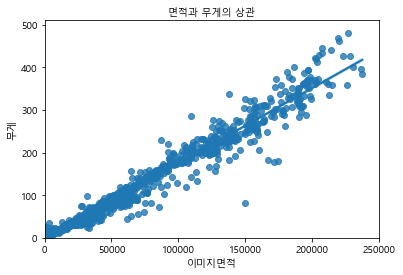

In [44]:
# 전체 면적과 무게 상관
sns.regplot(x=df1['이미지면적'], 
           y=df1['무게'], 
           fit_reg=True) 
plt.axis([0, 250000, 0, 20])
plt.title('면적과 무게의 상관', fontsize=10)

corr=np.corrcoef(df1['이미지면적'],df1['무게'])[0,1]

print(f"상관계수:{corr}")



In [79]:
df['case_idx']=pd.to_numeric(df['case'].str[4:6])
df2=df.loc[:, df.columns != 'case']
df2.head(10)

,시간,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,레드 LED동작강도,...,냉방부하,난방온도,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,이미지면적,무게,case_idx
11159,2021-05-12 20:45,22.799999,58.900002,83.400002,0.0,590.0,22.400000,0.0,201.0,201.0,...,0.0000,15.0,33.999996,0.00,0.0000,0.0000,NaN,70254.0,123.359,1
10553,2021-05-12 10:39,29.600000,37.400002,80.400002,0.0,356.0,25.100000,0.0,201.0,201.0,...,376.1743,26.0,8.000002,309.41,18.2028,48.5615,NaN,70254.0,123.359,1
10554,2021-05-12 10:40,29.700001,37.799999,80.400002,0.0,356.0,25.100000,0.0,201.0,201.0,...,376.1743,26.0,8.500004,309.41,18.2028,48.5615,NaN,70254.0,123.359,1
10555,2021-05-12 10:41,29.700001,38.700001,80.400002,201.0,355.0,25.100000,0.0,201.0,201.0,...,376.1743,26.0,8.500004,309.41,18.2028,48.5615,NaN,70254.0,123.359,1
10556,2021-05-12 10:42,29.799999,38.200001,80.400002,0.0,350.0,25.100000,0.0,201.0,201.0,...,376.1743,26.0,8.999996,309.41,18.2028,48.5615,NaN,70254.0,123.359,1
10557,2021-05-12 10:43,29.799999,39.000000,80.500000,0.0,351.0,25.200001,0.0,201.0,201.0,...,376.1743,26.0,8.999996,309.41,18.2028,48.5615,NaN,70254.0,123.359,1
10558,2021-05-12 10:44,29.799999,39.000000,80.599998,0.0,344.0,25.200001,0.0,201.0,201.0,...,376.1743,26.0,8.999996,309.41,18.2028,48.5615,NaN,70254.0,123.359,1
10559,2021-05-12 10:45,29.600000,38.799999,70.800003,NaN,363.0,25.299999,0.0,201.0,201.0,...,376.1743,26.0,8.000002,309.41,18.2028,48.5615,NaN,70254.0,123.359,1
10560,2021-05-12 10:46,29.400000,38.700001,62.099998,0.0,423.0,25.299999,0.0,201.0,201.0,...,376.1743,26.0,6.999998,309.41,18.2028,48.5615,NaN,70254.0,123.359,1
10561,2021-05-12 10:47,29.400000,38.299999,62.400002,0.0,455.0,25.400000,0.0,201.0,201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70254.0,123.359,1


In [80]:
df2['월일']=df2['시간'].str[5:10]
df2=df2.loc[:, df2.columns != '시간']
df2.head(10)

,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,레드 LED동작강도,블루 LED동작강도,...,난방온도,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,이미지면적,무게,case_idx,월일
11159,22.799999,58.900002,83.400002,0.0,590.0,22.400000,0.0,201.0,201.0,0.0,...,15.0,33.999996,0.00,0.0000,0.0000,NaN,70254.0,123.359,1,05-12
10553,29.600000,37.400002,80.400002,0.0,356.0,25.100000,0.0,201.0,201.0,NaN,...,26.0,8.000002,309.41,18.2028,48.5615,NaN,70254.0,123.359,1,05-12
10554,29.700001,37.799999,80.400002,0.0,356.0,25.100000,0.0,201.0,201.0,0.0,...,26.0,8.500004,309.41,18.2028,48.5615,NaN,70254.0,123.359,1,05-12
10555,29.700001,38.700001,80.400002,201.0,355.0,25.100000,0.0,201.0,201.0,NaN,...,26.0,8.500004,309.41,18.2028,48.5615,NaN,70254.0,123.359,1,05-12
10556,29.799999,38.200001,80.400002,0.0,350.0,25.100000,0.0,201.0,201.0,0.0,...,26.0,8.999996,309.41,18.2028,48.5615,NaN,70254.0,123.359,1,05-12
10557,29.799999,39.000000,80.500000,0.0,351.0,25.200001,0.0,201.0,201.0,0.0,...,26.0,8.999996,309.41,18.2028,48.5615,NaN,70254.0,123.359,1,05-12
10558,29.799999,39.000000,80.599998,0.0,344.0,25.200001,0.0,201.0,201.0,NaN,...,26.0,8.999996,309.41,18.2028,48.5615,NaN,70254.0,123.359,1,05-12
10559,29.600000,38.799999,70.800003,NaN,363.0,25.299999,0.0,201.0,201.0,0.0,...,26.0,8.000002,309.41,18.2028,48.5615,NaN,70254.0,123.359,1,05-12
10560,29.400000,38.700001,62.099998,0.0,423.0,25.299999,0.0,201.0,201.0,NaN,...,26.0,6.999998,309.41,18.2028,48.5615,NaN,70254.0,123.359,1,05-12
10561,29.400000,38.299999,62.400002,0.0,455.0,25.400000,0.0,201.0,201.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,70254.0,123.359,1,05-12


In [138]:
df3=df2.groupby("case_idx").max()
idx_notnull=df3[df3['최근분무량'].notnull()].index
idx=df2['case_idx'].isin(idx_notnull)
df2_1=df2[idx]
df2_1

,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,레드 LED동작강도,블루 LED동작강도,...,난방온도,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,이미지면적,무게,case_idx,월일
11159,22.799999,58.900002,83.400002,0.000000,590.0,22.4,0.0,201.0,201.0,0.0,...,15.0,33.999996,0.0000,0.0000,0.0000,NaN,70254.0,123.359,1,05-12
10553,29.600000,37.400002,80.400002,0.000000,356.0,25.1,0.0,201.0,201.0,NaN,...,26.0,8.000002,309.4100,18.2028,48.5615,NaN,70254.0,123.359,1,05-12
10554,29.700001,37.799999,80.400002,0.000000,356.0,25.1,0.0,201.0,201.0,0.0,...,26.0,8.500004,309.4100,18.2028,48.5615,NaN,70254.0,123.359,1,05-12
10555,29.700001,38.700001,80.400002,201.000000,355.0,25.1,0.0,201.0,201.0,NaN,...,26.0,8.500004,309.4100,18.2028,48.5615,NaN,70254.0,123.359,1,05-12
10556,29.799999,38.200001,80.400002,0.000000,350.0,25.1,0.0,201.0,201.0,0.0,...,26.0,8.999996,309.4100,18.2028,48.5615,NaN,70254.0,123.359,1,05-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,28.000000,22.100000,84.099998,56.099998,355.0,0.0,126.0,100.0,11.0,31.0,...,25.0,0.000000,376.1743,309.4100,18.2028,48.5615,121913.5,209.824,75,05-29
1916,28.000000,22.000000,84.099998,56.099998,360.0,0.0,126.0,100.0,11.0,31.0,...,25.0,0.000000,376.1743,309.4100,18.2028,48.5615,121913.5,209.824,75,05-29
1915,27.900000,22.000000,83.900002,56.000000,365.0,0.0,126.0,100.0,11.0,31.0,...,25.0,0.000000,376.1743,309.4100,18.2028,48.5615,121913.5,209.824,75,05-29
1913,27.799999,22.100000,83.500000,55.900002,388.0,0.0,126.0,100.0,11.0,31.0,...,25.0,0.000000,376.1743,309.4100,18.2028,48.5615,121913.5,209.824,75,05-29


In [139]:
df2_1=df2_1.groupby(['case_idx','월일']).mean()
df2_1=df2_1.reset_index()
df2_1=round(df2_1,3)

In [140]:
df2_1.head()
#df2_1.to_csv('c:/data/dacon/df2_1.csv')


,case_idx,월일,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,...,냉방온도,냉방부하,난방온도,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,이미지면적,무게
0,1,05-07,22.809,43.402,77.436,5.352,475.724,20.044,0.0,200.672,...,17.862,202.837,19.356,10.363,164.958,14.010,23.870,NaN,30803.000,49.193
1,1,05-08,22.962,43.638,77.654,4.840,478.774,20.662,0.0,200.857,...,17.415,179.413,18.852,13.461,145.930,12.390,21.094,NaN,36825.747,58.545
2,1,05-09,22.927,40.362,77.490,4.616,485.095,20.682,0.0,200.856,...,17.417,179.555,18.855,13.325,146.041,12.376,21.138,NaN,43926.532,70.774
3,1,05-10,21.050,56.356,79.911,4.006,488.493,18.266,0.0,200.422,...,17.417,179.504,18.854,7.633,146.006,12.370,21.128,NaN,51824.181,84.178
4,1,05-11,21.819,67.788,81.271,4.687,483.208,19.295,0.0,200.422,...,17.417,179.523,18.855,10.663,146.000,12.397,21.127,NaN,59297.368,100.600


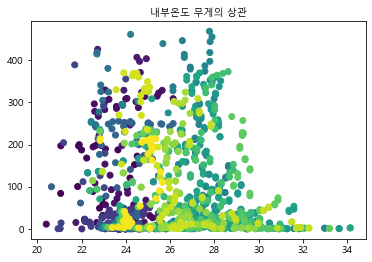

상관계수:nan


In [151]:
# 내부온도 무게 상관
plt.scatter(df2_1['내부온도관측치'],df2_1['무게'],c=df2_1['case_idx']) 
plt.title('내부온도 무게의 상관', fontsize=10)
plt.show()

corr=np.corrcoef(df2_1['내부온도관측치'],df2_1['무게'])[0,1]
print(f"상관계수:{corr}")

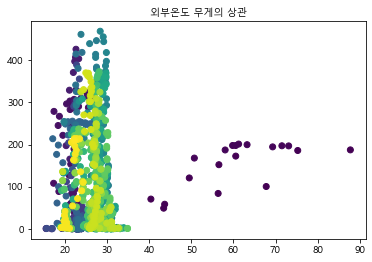

상관계수:nan


In [152]:
# 외부온도 무게 상관
plt.scatter(df2_1['외부온도관측치'],df2_1['무게'],c=df2_1['case_idx']) 
plt.title('외부온도 무게의 상관', fontsize=10)
plt.show()

corr=np.corrcoef(df2_1['외부온도관측치'],df2_1['무게'])[0,1]
print(f"상관계수:{corr}")

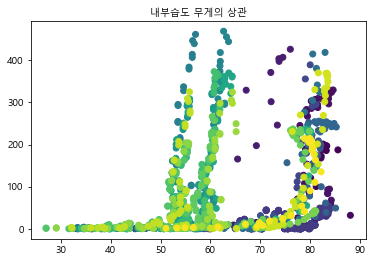

상관계수:nan


In [153]:
# 내부습도 무게 상관
plt.scatter(df2_1['내부습도관측치'],df2_1['무게'],c=df2_1['case_idx']) 
plt.title('내부습도 무게의 상관', fontsize=10)
plt.show()

corr=np.corrcoef(df2_1['내부습도관측치'],df2_1['무게'])[0,1]
print(f"상관계수:{corr}")

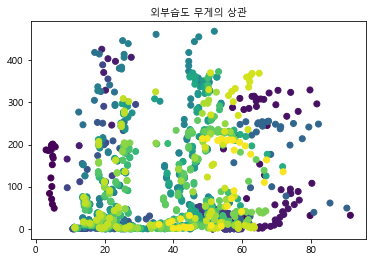

상관계수:nan


In [154]:
# 외부습도 무게 상관
plt.scatter(df2_1['외부습도관측치'],df2_1['무게'],c=df2_1['case_idx']) 
plt.title('외부습도 무게의 상관', fontsize=10)
plt.show()

corr=np.corrcoef(df2_1['외부습도관측치'],df2_1['무게'])[0,1]
print(f"상관계수:{corr}")

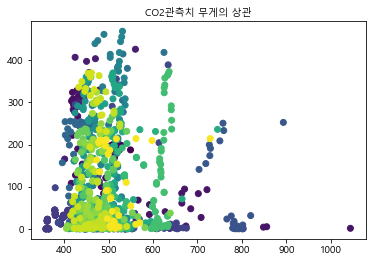

상관계수:nan


In [156]:
# CO2관측치 무게 상관
plt.scatter(df2_1['CO2관측치'],df2_1['무게'],c=df2_1['case_idx']) 
plt.title('CO2관측치 무게의 상관', fontsize=10)
plt.show()

corr=np.corrcoef(df2_1['CO2관측치'],df2_1['무게'])[0,1]
print(f"상관계수:{corr}")

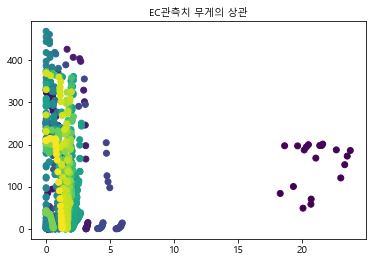

상관계수:nan


In [158]:
# EC관측치 무게 상관
plt.scatter(df2_1['EC관측치'],df2_1['무게'],c=df2_1['case_idx']) 
plt.title('EC관측치 무게의 상관', fontsize=10)
plt.show()

corr=np.corrcoef(df2_1['EC관측치'],df2_1['무게'])[0,1]
print(f"상관계수:{corr}")

In [ ]:
# 온도 습도 bp
ax.boxplot([df2_1['내부온도']])